In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
circ = QuantumCircuit(qr, crz, crx)
q0=[0.8,0.6j]
circ.initialize(q0,0)

In [3]:
circ.barrier()
circ.h(1)
circ.cx(1,2)   
'''
Building the circuit for producing EPR
'''

'\nBuilding the circuit for producing EPR\n'

In [4]:
circ.barrier()
circ.cx(0,1)
circ.h(0)
circ.barrier()

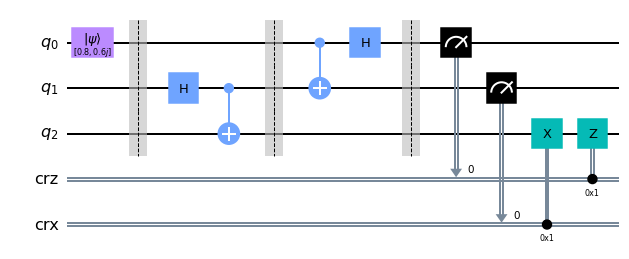

In [5]:
circ.measure([0,1],[0,1])
circ.x(2).c_if(crx, 1) # Apply gates if the registers 
circ.z(2).c_if(crz, 1) # are in the state '1'
circ.draw('mpl')

In [6]:
sim = Aer.get_backend('aer_simulator')
circ.save_statevector()
out_vector = sim.run(circ).result().get_statevector()


In [7]:
print(out_vector)

[ 0.00000000e+00+0.j   8.00000000e-01+0.j   0.00000000e+00+0.j
  0.00000000e+00-0.j  -0.00000000e+00+0.j   7.34788079e-17+0.6j
 -0.00000000e+00+0.j  -0.00000000e+00+0.j ]
